<a href="https://colab.research.google.com/github/tugcebyrl/MachineLearning/blob/main/FBProphet_Time_Based_AI_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [2]:
!pip install yfinance

In [3]:
from prophet import Prophet
import yfinance as yf

In [40]:
df=yf.download('LUNC-USD',"2020-01-01","2024-09-18")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,0.258799,0.258799,0.230810,0.231019,0.231019,4937398
2020-01-02,0.230817,0.231536,0.210544,0.211493,0.211493,3820795
2020-01-03,0.212133,0.243367,0.198519,0.220498,0.220498,3910837
2020-01-04,0.220483,0.251936,0.217744,0.242335,0.242335,2588742
2020-01-05,0.242279,0.243787,0.237418,0.240061,0.240061,1443810
...,...,...,...,...,...,...
2024-09-13,0.000085,0.000086,0.000083,0.000085,0.000085,14517806
2024-09-14,0.000085,0.000091,0.000085,0.000089,0.000089,32149599
2024-09-15,0.000089,0.000090,0.000083,0.000083,0.000083,20346500


In [41]:
df=df[['Close']]
df=df.reset_index()
df.columns=['ds','y']
df.head(3)

,ds,y
0,2020-01-01,0.231019
1,2020-01-02,0.211493
2,2020-01-03,0.220498


In [42]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpussz2xsw/5qygu7lc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpussz2xsw/pntlv0f5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90674', 'data', 'file=/tmp/tmpussz2xsw/5qygu7lc.json', 'init=/tmp/tmpussz2xsw/pntlv0f5.json', 'output', 'file=/tmp/tmpussz2xsw/prophet_modeliak84zgr/prophet_model-20240918172044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
df_future=model.make_future_dataframe(180) #periods default day

In [44]:
pred_future=model.predict(df_future)
print(pred_future)

             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2020-01-01 -2.037517   -8.012363   13.579405    -2.037517    -2.037517   
1    2020-01-02 -2.024860   -7.954708   13.812289    -2.024860    -2.024860   
2    2020-01-03 -2.012202   -8.082432   14.005317    -2.012202    -2.012202   
3    2020-01-04 -1.999545   -7.958929   12.992197    -1.999545    -1.999545   
4    2020-01-05 -1.986887   -7.850618   13.816607    -1.986887    -1.986887   
...         ...       ...         ...         ...          ...          ...   
1897 2025-03-12  2.012530  -12.397258   27.590005   -15.800056    17.940890   
1898 2025-03-13  2.016560  -12.690453   27.135336   -15.909248    18.101108   
1899 2025-03-14  2.020590  -10.760253   29.938567   -15.990530    18.341964   
1900 2025-03-15  2.024620  -11.183633   30.477342   -16.086527    18.533134   
1901 2025-03-16  2.028650  -10.464920   30.521262   -16.178156    18.722275   

      additive_terms  additive_terms_lower  additiv

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


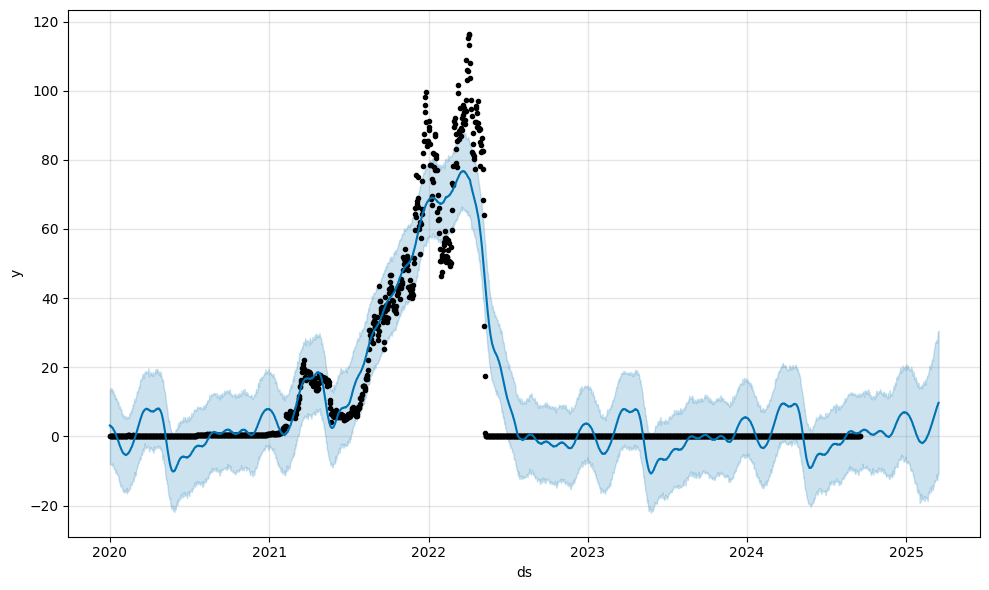

In [45]:
model.plot(pred_future);
# Blue Line: This line represents the future values ​​predicted by the model
# Black Dots: These dots represent actual observations of your existing data.
# The light blue area shows the margin of error.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

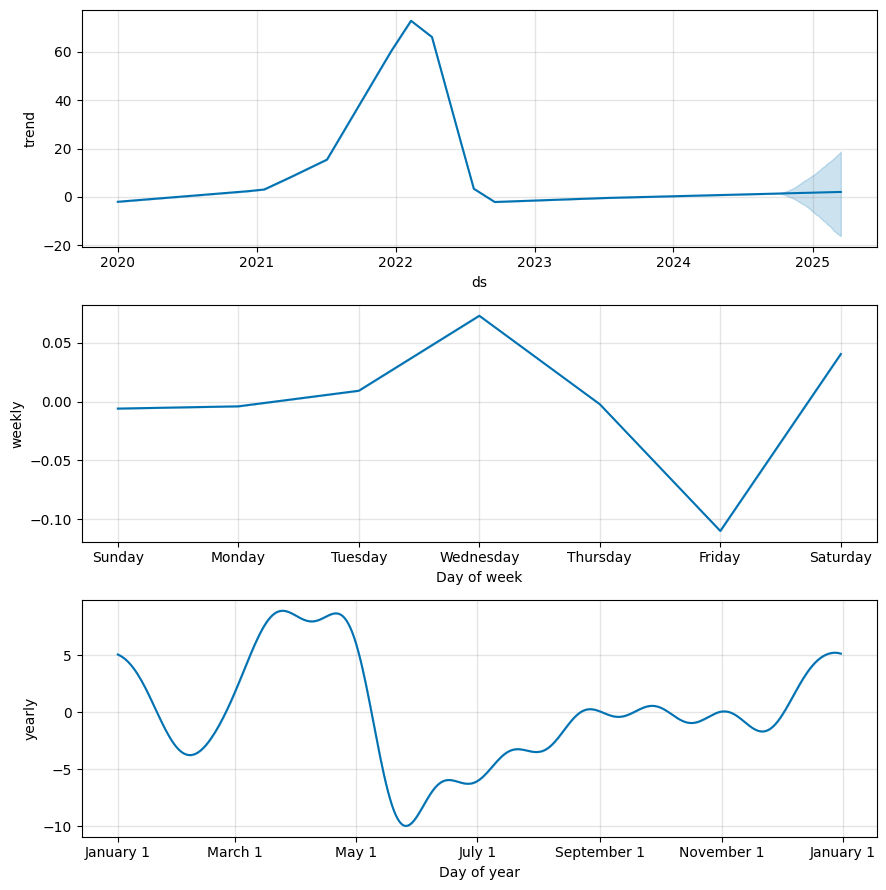

In [46]:
model.plot_components(pred_future);